# Import Libs

In [1]:
import re
import numpy as np
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense

# Load Data

In [2]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')
df.head()

,Spam,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# Download punkt

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mohammed\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Download stopwords

In [4]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mohammed\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
def preprocess_text(text):

    tokens = word_tokenize(text.lower())
    
    tokens = [token for token in tokens if token not in string.punctuation]
    
    stop_words = stopwords.words('english')
    tokens = [token for token in tokens if token not in stop_words]
    
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    
    preprocessed_text = ' '.join(tokens)
    
    preprocessed_text = re.sub(r'http\S+|www\S+', '', preprocessed_text)
    
    preprocessed_text = re.sub(r'\d+', '', preprocessed_text)
    return preprocessed_text

In [6]:
email="Hello! These are 5678 examples of emails for spam classification."
preprocessed_email = preprocess_text(email)
print(preprocessed_email)

hello  exampl email spam classif


In [7]:
df['processed_Message']=df['Message'].apply(preprocess_text)
df

,Spam,Message,processed_Message
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi .. avail bugi n great wo...
1,0,Ok lar... Joking wif u oni...,ok lar ... joke wif u oni ...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt st ...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor ... u c alreadi say ...
4,0,"Nah I don't think he goes to usf, he lives aro...",nah n't think goe usf live around though
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,nd time tri contact u. u å£ pound prize clai...
5568,0,Will Ì_ b going to esplanade fr home?,ì_ b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",piti mood ... suggest
5570,0,The guy did some bitching but I acted like i'd...,guy bitch act like 'd interest buy someth els ...


In [8]:
df_spam=df[df['Spam']==1]
df_spam.head()

,Spam,Message,processed_Message
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt st ...
5,1,FreeMsg Hey there darling it's been 3 week's n...,freemsg hey darl 's week 's word back 'd like...
8,1,WINNER!! As a valued network customer you have...,winner valu network custom select receivea å£ ...
9,1,Had your mobile 11 months or more? U R entitle...,mobil month u r entitl updat latest colour mo...
11,1,"SIX chances to win CASH! From 100 to 20,000 po...","six chanc win cash , pound txt csh send . cos..."


In [9]:
spam_words_list = df_spam['processed_Message'].astype(str)
spam_words_list

2       free entri  wkli comp win fa cup final tkt st ...
5       freemsg hey darl 's  week 's word back 'd like...
8       winner valu network custom select receivea å£ ...
9       mobil  month u r entitl updat latest colour mo...
11      six chanc win cash  , pound txt csh send . cos...
                              ...                        
5537    want explicit sex  sec ring  cost p/min gsex p...
5540    ask mobil  chatlin inclu free min india cust s...
5547    contract mobil  mnth latest motorola nokia etc...
5566    remind o get . pound free call credit detail g...
5567    nd time tri  contact u. u å£ pound prize  clai...
Name: processed_Message, Length: 747, dtype: object

# Plot Word Cloud

In [10]:
spam_words_str=' '.join(spam_words_list)
spam_words_str

"free entri  wkli comp win fa cup final tkt st may . text fa  receiv entri question std txt rate c 's appli over 's freemsg hey darl 's  week 's word back 'd like fun still tb ok xxx std chg send å£. rcv winner valu network custom select receivea å£ prize reward claim call . claim code kl valid  hour mobil  month u r entitl updat latest colour mobil camera free call mobil updat co free  six chanc win cash  , pound txt csh send . cost p/day day + tsandc appli repli hl  info urgent  week free membership å£, prize jackpot txt word claim  c  lccltd pobox ldnwarw xxxmobilemovieclub use credit click wap link next txt messag click http //wap xxxmobilemovieclub.com n=qjkgighjjgcbl england v macedonia dont miss goals/team news txt ur nation team  eg england  tri wale scotland txt/ì¼. poboxoxwwq + thank subscript rington uk mobil charg å£/month pleas confirm repli ye repli charg  rodger burn msg tri call repli sm free nokia mobil free camcord pleas call  deliveri tomorrow sm ac sptv new jersey d

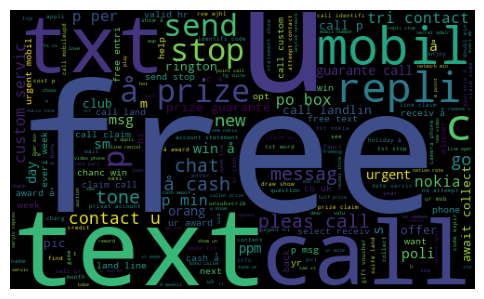

In [11]:
spam_words_list = df_spam['processed_Message'].astype(str)

spam_words_str=' '.join(spam_words_list)

spam_wordcloud = WordCloud(width=500, height=300).generate(spam_words_str)

plt.figure(figsize=(6, 4))

plt.imshow(spam_wordcloud)

plt.axis("off")

plt.show()

In [12]:
corpus=df['processed_Message']
max_features=100

In [13]:
count_vectorizer = CountVectorizer(max_features=max_features)
vectors = count_vectorizer.fit_transform(corpus)

In [14]:
tfidf_vectorizer = TfidfVectorizer(max_features=max_features)
tfidf_vectors = tfidf_vectorizer.fit_transform(corpus)

In [15]:
#X = vectors
X = tfidf_vectors

y = df['Spam']

X = X.toarray()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [16]:
X_train[1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [17]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

model.summary()

C:\Users\mohammed\anaconda3\envs\MWS_env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         6,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,577 (33.50 KB)

 Trainable params: 8,577 (33.50 KB)

 Non-trainable params: 0 (0.00 B)

# Train

In [18]:
model.fit(X_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7268 - loss: 0.5714
Epoch 2/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9144 - loss: 0.1990
Epoch 3/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9579 - loss: 0.1224
Epoch 4/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9609 - loss: 0.1083
Epoch 5/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9696 - loss: 0.0980
Epoch 6/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9705 - loss: 0.0857
Epoch 7/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9752 - loss: 0.0809
Epoch 8/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9743 - loss: 0.0812
Epoch 9/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9795 - loss: 0.0767
Epoch 10/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9799 - loss: 0.0734
Epoch 11/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9788 - loss: 0.0667
Epoch 12/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

# Calculate Accuracy

In [19]:
y_pred_prob = model.predict(X_test)
y_pred = np.round(y_pred_prob)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy*100,2))

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy: 96.2


# Predict

In [20]:
message="call to get free prize one million dollars"

processed_message=preprocess_text(message)

vector=tfidf_vectorizer.transform([processed_message])
vector_dense=vector.toarray()

y_pred_prob = model.predict(vector_dense)

y_pred = np.round(y_pred_prob)
print(y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[1.]]


In [21]:
["ham", "spam"][int(y_pred[0][0])]

'spam'

In [22]:
message="Hello Have a good day please call me"

processed_message=preprocess_text(message)

vector=tfidf_vectorizer.transform([processed_message])
vector_dense=vector.toarray()

y_pred_prob = model.predict(vector_dense)

y_pred = np.round(y_pred_prob)
print(y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
[[0.]]


In [23]:
["ham", "spam"][int(y_pred[0][0])]

'ham'